<a href="https://colab.research.google.com/github/Darshini-A/Data-Science-2/blob/main/Class/Clust%20%3A%20knowledge%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Q:2 predict student knowledge level
# classification / clustering models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

In [ ]:
df = pd.read_csv('/content/User Knowledge.csv')
df.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [ ]:
 pd.DataFrame(df.describe())

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


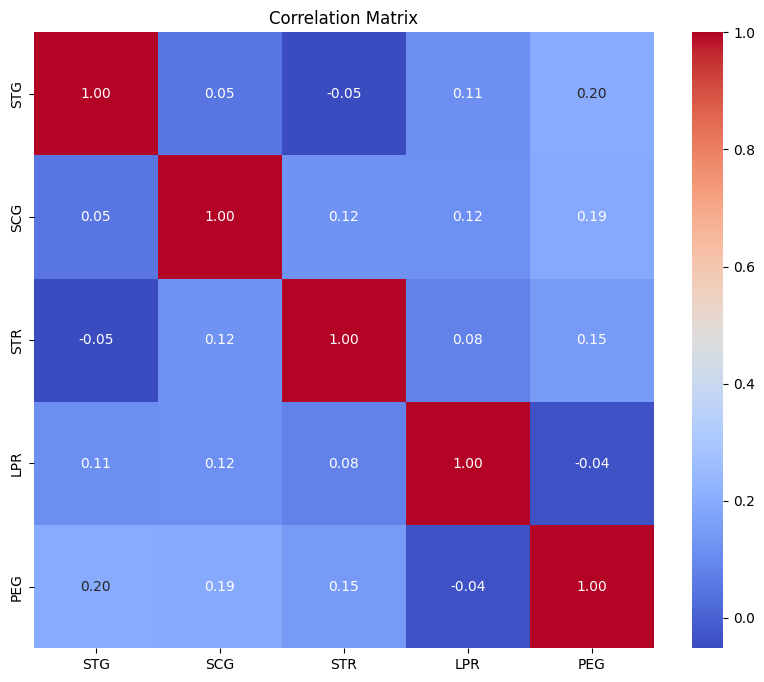

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

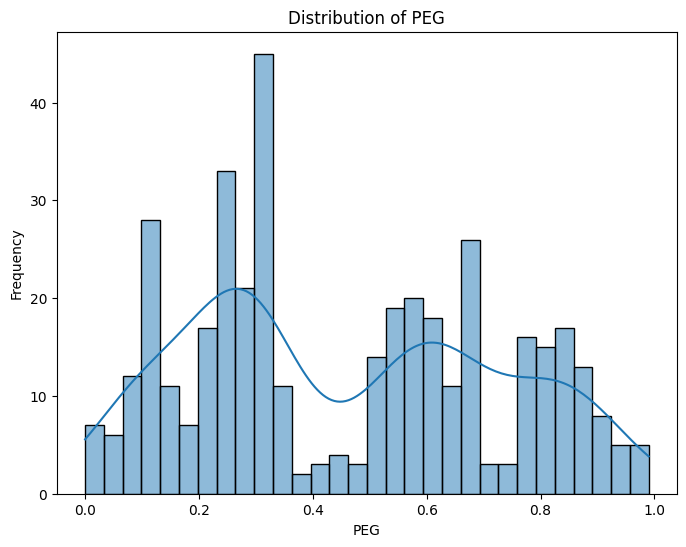

In [ ]:
# Visualize the distribution of the target variable 'PEG'
plt.figure(figsize=(8, 6))
sns.histplot(df['PEG'], bins=30, kde=True)
plt.title('Distribution of PEG')
plt.xlabel('PEG')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Using SelectKBest to select the top k features based on ANOVA F-statistic
X = df[['STG', 'SCG', 'STR', 'LPR']]
y = df['PEG']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

selector = SelectKBest(f_classif, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = [feature for feature, selected in zip(X.columns, selector.get_support()) if selected]

print("Selected Features:", selected_features)

Selected Features: ['STG', 'SCG', 'STR', 'LPR']


In [ ]:
# Convert 'y_train' to integer classes
y_train_int = y_train.astype(int)
# Create and fit the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train_selected, y_train_int)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_int = y_test.astype(int)

# Transform 'X_test' using the same selector used for training data
X_test_selected = selector.transform(X_test)

y_pred = model.predict(X_test_selected)

print("Classification Report:\n", classification_report(y_test_int, y_pred))
print("Accuracy:", accuracy_score(y_test_int, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

Accuracy: 1.0
